In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('./breast_cancer_data.csv')

In [3]:
df

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
0            0  
1            0  
2            0  
3            0  
4            0  
..         ...  
564          0  
565          0  
566          0  
567          0  
568          1  

[569 rows x 6 columns]

In [4]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
df.describe()

mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       569.000000  569.000000  
mean          0.096360    0.627417  
std           0.014064    0.483918  
min           0.052630    0.000000  
25%           0.086370    0.000000  
50%           0.095870    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000

<Figure size 864x432 with 0 Axes>

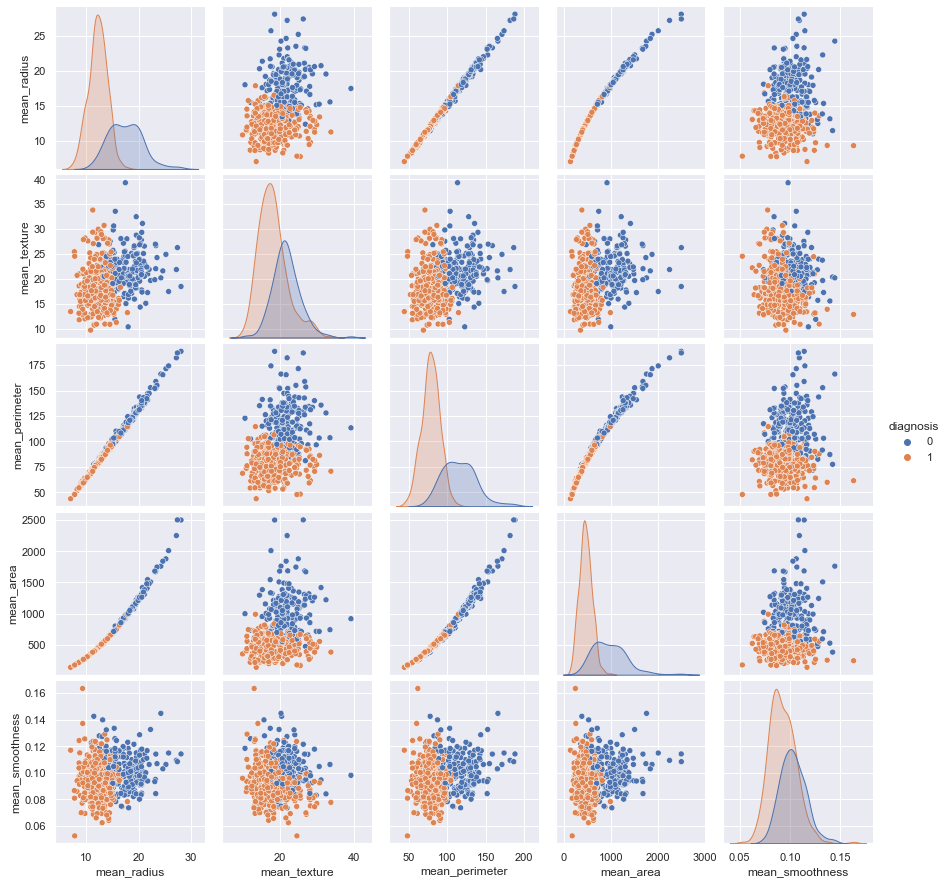

In [7]:
plt.figure(figsize=(12,6))
sns.pairplot(df, hue='diagnosis')
plt.show()

<AxesSubplot:>

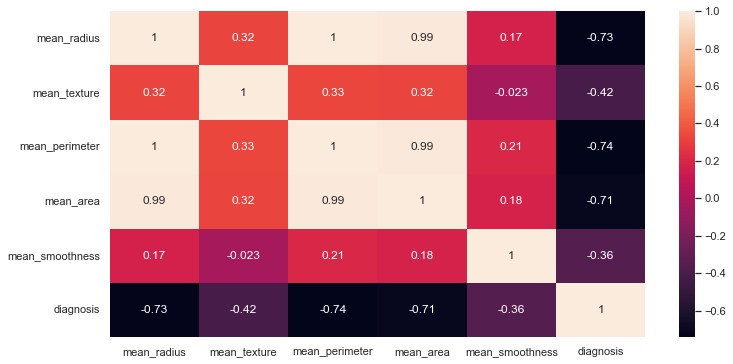

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

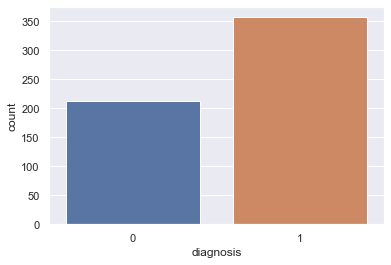

In [9]:
sns.countplot(data=df, x='diagnosis')

In [10]:
df.head(2)

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   

   diagnosis  
0          0  
1          0

In [11]:
radius = df[['mean_radius', 'diagnosis']].groupby('diagnosis').mean().reset_index()
texture = df[['mean_texture', 'diagnosis']].groupby('diagnosis').mean().reset_index()
perimeter = df[['mean_perimeter', 'diagnosis']].groupby('diagnosis').mean().reset_index()
area = df[['mean_area', 'diagnosis']].groupby('diagnosis').mean().reset_index()
smoothness = df[['mean_smoothness', 'diagnosis']].groupby('diagnosis').mean().reset_index()

In [12]:
radius.head()

diagnosis  mean_radius
0          0    17.462830
1          1    12.146524

Text(0.5, 1.0, 'Diagnosis Distribution')

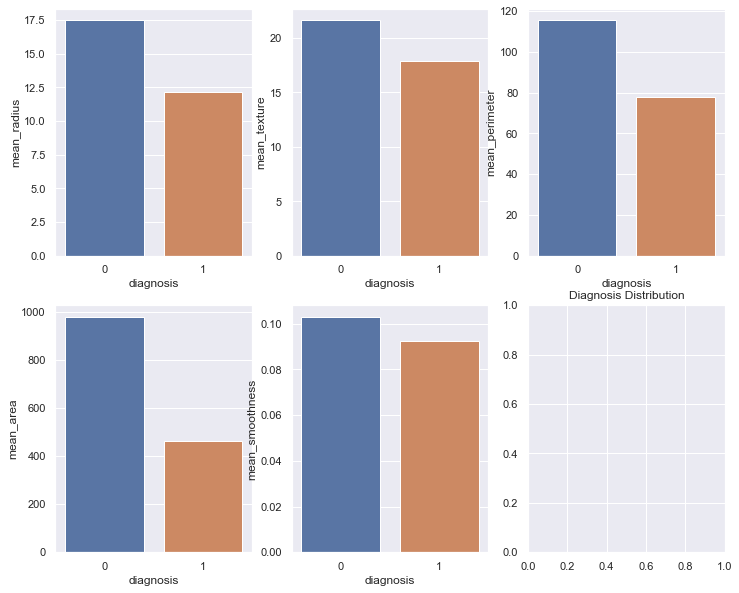

In [13]:
fig, ax = plt.subplots(2,3, figsize=(12,10))
sns.barplot(data=radius, x='diagnosis', y='mean_radius', ax=ax[0,0])
sns.barplot(data=texture, x='diagnosis', y='mean_texture', ax=ax[0,1])
sns.barplot(data=perimeter, x='diagnosis', y='mean_perimeter', ax=ax[0,2])
sns.barplot(data=area, x='diagnosis', y='mean_area', ax=ax[1,0])
sns.barplot(data=smoothness, x='diagnosis', y='mean_smoothness', ax=ax[1,1])
plt.title('Diagnosis Distribution')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
import sklearn.utils

In [16]:
df=sklearn.utils.shuffle(df)

In [114]:
x=df[['mean_radius','mean_perimeter', 'mean_texture', 'mean_area', 'mean_smoothness']]
y = df[['diagnosis']]

In [115]:
x

mean_radius  mean_perimeter  mean_texture  mean_area  mean_smoothness
26         14.58           97.41         21.53      644.8          0.10540
177        16.46          109.30         20.11      832.9          0.09831
250        20.94          138.90         23.56     1364.0          0.10070
551        11.13           71.49         22.44      378.4          0.09566
464        13.17           84.28         18.22      537.3          0.07466
..           ...             ...           ...        ...              ...
472        14.92           96.45         14.93      686.9          0.08098
473        12.27           77.42         29.97      465.4          0.07699
363        16.50          106.60         18.29      838.1          0.09686
312        12.76           82.29         13.37      504.1          0.08794
35         16.74          110.10         21.59      869.5          0.09610

[569 rows x 5 columns]

In [116]:
y.value_counts()

diagnosis
1            357
0            212
dtype: int64

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [118]:
model=LogisticRegression()

In [46]:
model.fit(x_train,y_train)

C:\Users\MR SAMMI\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MR SAMMI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
pred = model.predict(x_test)

In [48]:
pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0], dtype=int64)

In [63]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [84]:
recall= recall_score(y_test, pred)
accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test, pred, pos_label=1)
cf_matrix = confusion_matrix(y_test, pred)

In [90]:
print('Recall: ',round(recall,3))
print('Accuracy: ',round(accuracy,3))
print('Precision: ',round(precision,3))

Recall:  0.971
Accuracy:  0.93
Precision:  0.919


In [91]:
cf_matrix

array([[38,  6],
       [ 2, 68]], dtype=int64)

In [56]:
x_train.value_counts()

mean_radius  mean_perimeter  mean_texture  mean_area  mean_smoothness
6.981        43.79           13.43         143.5      0.11700            1
14.400       92.25           26.99         646.1      0.06995            1
14.900       102.10          22.53         685.0      0.09947            1
14.870       98.64           16.67         682.5      0.11620            1
             96.12           20.21         680.9      0.09587            1
                                                                        ..
12.210       78.31           18.02         458.4      0.09231            1
12.200       78.01           15.21         457.9      0.08673            1
12.190       79.08           13.29         455.8      0.10660            1
12.180       77.79           17.84         451.1      0.10450            1
28.110       188.50          18.47         2499.0     0.11420            1
Length: 455, dtype: int64

In [57]:
y_train.value_counts()

diagnosis
1            287
0            168
dtype: int64

In [34]:
import imblearn
from imblearn.over_sampling import SMOTE

In [36]:
sm=SMOTE(random_state=42)

In [71]:
x_resample, y_resample =sm.fit_resample(x_train, y_train)

In [72]:
print(x_resample.value_counts())
print(y_resample.value_counts())

mean_radius  mean_perimeter  mean_texture  mean_area    mean_smoothness
6.981000     43.790000       13.430000     143.500000   0.117000           1
15.700000    101.200000      20.310000     766.600000   0.095970           1
15.504546    102.972741      28.440095     746.354518   0.107355           1
15.530000    103.700000      33.560000     744.900000   0.106300           1
15.583463    103.565445      20.819461     803.325575   0.111391           1
                                                                          ..
12.720000    81.780000       13.780000     492.100000   0.096670           1
12.700000    80.880000       12.170000     495.000000   0.087850           1
12.670000    81.250000       17.300000     489.900000   0.102800           1
12.650000    82.690000       18.170000     485.600000   0.107600           1
28.110000    188.500000      18.470000     2499.000000  0.114200           1
Length: 574, dtype: int64
diagnosis
0            287
1            287
dtype: int6

In [73]:
model1 = LogisticRegression()

In [74]:
model1.fit(x_resample, y_resample)

C:\Users\MR SAMMI\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MR SAMMI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
new_pred = model1.predict(x_test)

In [92]:
smote_recall = recall_score(y_test, new_pred)
smote_accuracy = accuracy_score(y_test,new_pred)
smote_precision = precision_score(y_test, new_pred, pos_label=1)
smote_cf_matrix = confusion_matrix(y_test, new_pred)

In [93]:
print('Smote Results:')
print('Recall: ',round(smote_recall,3))
print('Accuracy: ',round(smote_accuracy,3))
print('Precision: ',round(smote_precision,3))

Smote Results:
Recall:  0.943
Accuracy:  0.939
Precision:  0.957


In [94]:
smote_cf_matrix

array([[41,  3],
       [ 4, 66]], dtype=int64)

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
tree_model = DecisionTreeClassifier()

In [97]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [98]:
tree_pred = tree_model.predict(x_test)

In [99]:
tree_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0], dtype=int64)

In [100]:
tree_recall = recall_score(y_test, tree_pred)
tree_accuracy = accuracy_score(y_test,tree_pred)
tree_precision = precision_score(y_test, tree_pred, pos_label=1)
tree_cf_matrix = confusion_matrix(y_test, tree_pred)

In [101]:
print('Decision Tree Results:')
print('Recall: ',round(tree_recall,3))
print('Accuracy: ',round(tree_accuracy,3))
print('Precision: ',round(tree_precision,3))

Decision Tree Results:
Recall:  0.929
Accuracy:  0.921
Precision:  0.942


In [102]:
tree_cf_matrix

array([[40,  4],
       [ 5, 65]], dtype=int64)

In [110]:
from sklearn.svm import SVC

In [119]:
svm_model = SVC()

In [121]:
svm_model.fit(x_train, y_train)

C:\Users\MR SAMMI\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [122]:
svm_pred = svm_model.predict(x_test)

In [123]:
svm_recall = recall_score(y_test, svm_pred)
svm_accuracy = accuracy_score(y_test,svm_pred)
svm_precision = precision_score(y_test, svm_pred, pos_label=1)
svm_cf_matrix = confusion_matrix(y_test, svm_pred)

In [124]:
print('SVC Results:')
print('Recall: ',round(svm_recall,3))
print('Accuracy: ',round(svm_accuracy,3))
print('Precision: ',round(svm_precision,3))

SVC Results:
Recall:  1.0
Accuracy:  0.921
Precision:  0.886


In [125]:
svm_cf_matrix

array([[35,  9],
       [ 0, 70]], dtype=int64)